<h3> Alan Stiven Camacho Restrepo  1001143307</h3>

In [1]:
from urllib.request import urlopen
book = urlopen("https://www.gutenberg.org/files/76/76-0.txt").read().decode('utf-8')

**a)** Analice el libro contando la aparición de tres nombres de personajes principales: Jim, Tom, Huck a través de los capítulos del libro.

In [2]:
'''
index_chap1 es la posición donde aparece el comienzo del capitulo 1 en el libro.

Para luego poner el texto anterior a ese capitulo 1 en mayuscula y de ahí en adelante en minuscula

'''
index_chap1 = book.find("CHAPTER I.\r\n")

book = book[:index_chap1].upper() + book[index_chap1:].lower()

In [3]:
'''
se reemplazan los signos de puntuación en el libro por espacios para poder identificar más fácil los nombres
acompañados de estos signos.

Por ejemplo:   Tom! --> Tom 
               jim? --> jim 
               tommorrow --> tommorow

'''

signos = [',',';','.',':','!','?',')','(']
for sgn in signos:
    book = book.replace(sgn," ")

In [4]:
'''
Se genera una lista separando el texto por medio de la palabra chapter en minuscula, por tanto el texto anterior 
al comienzo del capitulo 1 queda en el primer indice de la lista ya que está en mayuscula.
Por tanto, se elimina ese primer elemento para quedar solamente con los textos de los capitulos del libro

'''

book_list = book.split('chapter')
book_list.pop(0)
names = ['jim','tom','huck']

In [5]:
'''
Se generan tres listas donde se hace el conteo de cada nombre en cada capitulo 
y se agrega en su incio el nombre del personaje

'''

jim_count = [chapter.count(names[0]) for chapter in book_list]
jim_count.insert(0,names[0].capitalize())

tom_count = [chapter.count(names[1]) for chapter in book_list]
tom_count.insert(0,names[1].capitalize())

huck_count = [chapter.count(names[2]) for chapter in book_list]
huck_count.insert(0,names[2].capitalize())

**b)** Guarde sus resultados en un formato Pandas DataFrame para que se vea de la siguiente manera:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
columns = [f'chapter_{i+1}' for i in range(len(book_list))]
columns.insert(0,'name')

In [8]:
df = pd.DataFrame({0:tom_count,1:jim_count,2:huck_count})

In [9]:
data = df.T
data.columns = columns

In [10]:
data.rename(columns={'chapter_43':'chapter_the_last'},inplace=True)

In [11]:
data.columns

Index(['name', 'chapter_1', 'chapter_2', 'chapter_3', 'chapter_4', 'chapter_5',
       'chapter_6', 'chapter_7', 'chapter_8', 'chapter_9', 'chapter_10',
       'chapter_11', 'chapter_12', 'chapter_13', 'chapter_14', 'chapter_15',
       'chapter_16', 'chapter_17', 'chapter_18', 'chapter_19', 'chapter_20',
       'chapter_21', 'chapter_22', 'chapter_23', 'chapter_24', 'chapter_25',
       'chapter_26', 'chapter_27', 'chapter_28', 'chapter_29', 'chapter_30',
       'chapter_31', 'chapter_32', 'chapter_33', 'chapter_34', 'chapter_35',
       'chapter_36', 'chapter_37', 'chapter_38', 'chapter_39', 'chapter_40',
       'chapter_41', 'chapter_42', 'chapter_the_last'],
      dtype='object')

**c)** Exporte la tabla a un archivo CSV.

In [12]:
data.to_csv('count_names.csv',index=False)

**d)** Importe el archivo CSV guardado usando Pandas y haga un gráfico de la ocurrencia acumulada (cumsum) de los caracteres.

In [13]:
df = pd.read_csv('count_names.csv')

In [14]:
df

,name,chapter_1,chapter_2,chapter_3,chapter_4,chapter_5,chapter_6,chapter_7,chapter_8,chapter_9,...,chapter_34,chapter_35,chapter_36,chapter_37,chapter_38,chapter_39,chapter_40,chapter_41,chapter_42,chapter_the_last
0,Tom,6,24,5,1,0,2,5,2,1,...,15,18,19,11,32,12,11,9,32,6
1,Jim,0,16,0,8,0,0,0,22,11,...,17,18,24,4,27,10,13,0,12,6
2,Huck,3,2,3,1,0,2,0,6,1,...,6,9,2,0,3,1,3,1,2,5


In [15]:
#df.loc[0,'chapter_1':]
dicc_cumulative = {'cumulative_tom':df.iloc[0,1:].cumsum(),
                    'cumulative_jim': df.iloc[1,1:].cumsum(),
                    'cumulative_huck': df.iloc[2,1:].cumsum()}

cum_data = pd.DataFrame(dicc_cumulative)

<Figure size 1440x1440 with 0 Axes>

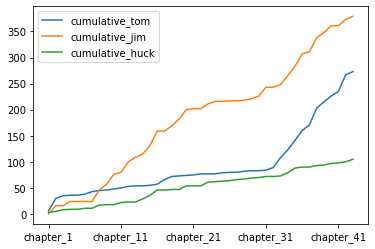

In [16]:
plt.figure(figsize=(20, 20))
cum_data.plot()
plt.show()

A través de la gráfica de las sumas acumuladas de los nombres a través de todos los capitulos, se puede observar que:
- Jim es el nombre que más ocurrencias tiene en el libro, entonces se puede deducir que es el personaje de dicho libro.
- Entre Tom y Huck se observa un comportamiento casi similar hasta aproximadamente el capitulo 30, luego de ese capitulo empieza a mencionarse más el nombre de Tom. 
- Huck es el nombre menos mencionado a través de todo el libro.  